In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import pickle
import yaml
import seaborn as sns
import importlib
from sklearn.metrics import f1_score
import Plots_Thesis
importlib.reload(Plots_Thesis)
from Plots_Thesis import Plotter

%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from sklearn.metrics import f1_score

def bootstrap_evaluation(results_labels, n_bootstrapsamples=100, seed=26):
    rng = np.random.default_rng(seed)
    
    # Convert the columns of the DataFrame to NumPy arrays for faster access
    y_array = results_labels['Y'].values
    y_hat_array = results_labels['Y_hat'].values
    y_prob_array = results_labels['Y_prob'].values
    
    # Preallocate a NumPy array to store results for all bootstrap samples
    bootstrapresults = np.zeros((n_bootstrapsamples, 3))  # 3 columns for acc, f1, nll

    # Loop through bootstrap samples
    for i in range(n_bootstrapsamples):
        # Generate a bootstrap sample index
        dataidx = rng.choice(results_labels.index, size=results_labels.shape[0], replace=True)

        # Get the bootstrap sample using NumPy indexing
        y = y_array[dataidx]
        y_hat = y_hat_array[dataidx]
        y_prob = y_prob_array[dataidx]

        # Calculate metrics
        acc = np.sum(y == y_hat) / len(y)
        f1 = f1_score(y, y_hat, average='macro')
        nll = -np.log(y_prob + 1e-12).mean()

        # Store results in the preallocated array
        bootstrapresults[i, :] = [acc, f1, nll]

    # Convert results to a DataFrame for returning
    result_df = pd.DataFrame(bootstrapresults, columns=['accuracy', 'f1_score', 'NLL'])

    return result_df


In [19]:
# def bootstrap_evaluation(results_labels, n_bootstrapsamples = 100, seed = 26):
#     bootstrapresults = []
#     rng = np.random.default_rng(seed)
#     for bootstrapsample_idx in np.arange(n_bootstrapsamples):
#         dataidx = rng.choice(results_labels.index, size = results_labels.shape[0], replace = True)

#         y = results_labels.loc[dataidx, 'Y'].values
#         y_hat = results_labels.loc[dataidx, 'Y_hat'].values
#         y_prob = results_labels.loc[dataidx, 'Y_prob'].values

#         acc = np.sum(y == y_hat) / len(y)
#         f1 = f1_score(y, y_hat, average = 'macro')
#         nll = -np.log(y_prob + 1e-12).mean()
#         bootstrapresults.append(pd.DataFrame({'accuracy': acc, 'f1_score': f1, 'NLL':nll}, index = [bootstrapsample_idx]))

#     return pd.concat(bootstrapresults)

In [6]:
cwd = Path.cwd()
folderpath = cwd / '..' / 'Data' / 'DHG2016'

folder = 'owpg_fullyconv'


plotspath = Path(r"C:\Users\Marc\OneDrive\Studium\Masterarbeit\Schreiben\figures\Plots")

In [135]:
myplt = Plotter(output = 'thesis')

In [7]:
odhg_path = cwd / '..' / 'Data' / 'ODHG2024' / 'concat_sequences_fullyconv_odhg'

DHG trained results

In [70]:
# Plot result bars

results_valid_labels_dhgtrained = pd.read_pickle(odhg_path/'results_valid_labels_dhgtrained.pkl')
results_valid_labels_dhgtrained_reversed = pd.read_pickle(odhg_path/'results_valid_labels_dhgtrained_reversed.pkl')


In [20]:
bootstrapresults_dhgtrained = bootstrap_evaluation(results_valid_labels_dhgtrained, n_bootstrapsamples = 1000)
bootstrapresults_dhgtrained.to_pickle(odhg_path/'bootstrapresults'/'bootstrapresults_dhgtrained.pkl')
bootstrapresults_dhgtrained_reversed = bootstrap_evaluation(results_valid_labels_dhgtrained_reversed, n_bootstrapsamples = 1000)
bootstrapresults_dhgtrained_reversed.to_pickle(odhg_path/'bootstrapresults'/'bootstrapresults_dhgtrained_reversed.pkl')

# 90 min

[[ 0.30001468  0.12843823 18.45556579  2.        ]
 [ 0.30078376  0.1291305  18.47755408  2.        ]]
[[ 0.29698101  0.10270603 18.66636457  1.        ]
 [ 0.29763173  0.10326299 18.68482642  1.        ]]


c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:433: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(ax = ax1, data=scores_concat_plot1, x=categorie, y="value", hue="metric", errorbar = lambda x: np.quantile(x, [0.025, 0.975]), dodge = False,width = 0.3, palette=self.colorpalette)
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:444: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.barplot(ax = ax1_2, data=scores_concat_plot2, x=categorie, y="value", hue="metric", errorbar = lambda x: np.quantile(x, [0.025, 0.975]), dodge = False, width = 0.3, palette=colorpalette2)


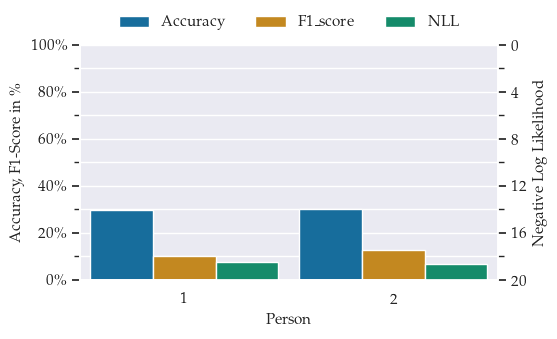

In [97]:
bootstrapresults_dhgtrained = pd.read_pickle(odhg_path/'bootstrapresults'/'bootstrapresults_dhgtrained.pkl')
bootstrapresults_dhgtrained_reversed = pd.read_pickle(odhg_path/'bootstrapresults'/'bootstrapresults_dhgtrained_reversed.pkl')

bootstrapresults_dhgtrained['Person'] = 2
bootstrapresults_dhgtrained_reversed['Person'] = 1
print(np.quantile(bootstrapresults_dhgtrained.values, [0.025, 0.975], axis = 0))
print(np.quantile(bootstrapresults_dhgtrained_reversed.values, [0.025, 0.975], axis = 0))
DHG_results = pd.concat([bootstrapresults_dhgtrained, bootstrapresults_dhgtrained_reversed])

fig = myplt.plot_resultbars_ODHG(DHG_results, NLLrange = [0,20])

# fig.savefig((plotspath / 'results_DHG_trained.pdf').resolve(), bbox_inches='tight')


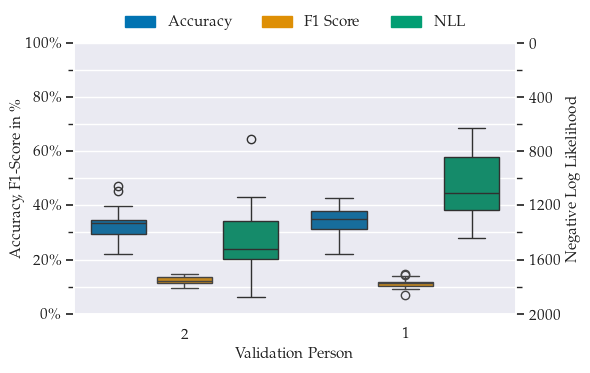

In [107]:
results_scores_dhgtrained = pd.read_pickle(odhg_path/'results_scores_dhgtrained.pkl')
results_scores_dhgtrained_reversed = pd.read_pickle(odhg_path/'results_scores_dhgtrained_reversed.pkl')

results_scores_dhgtrained['Validation Person'] = '2'
results_scores_dhgtrained_reversed['Validation Person'] = '1'
DHG_results = pd.concat([results_scores_dhgtrained, results_scores_dhgtrained_reversed])

fig = myplt.plot_result_boxplot(DHG_results,  NLLrange = [0,2000], percentrange = [0,100], fraction=1)
fig.savefig((plotspath / 'results_DHG_trained.pdf').resolve(), bbox_inches='tight')

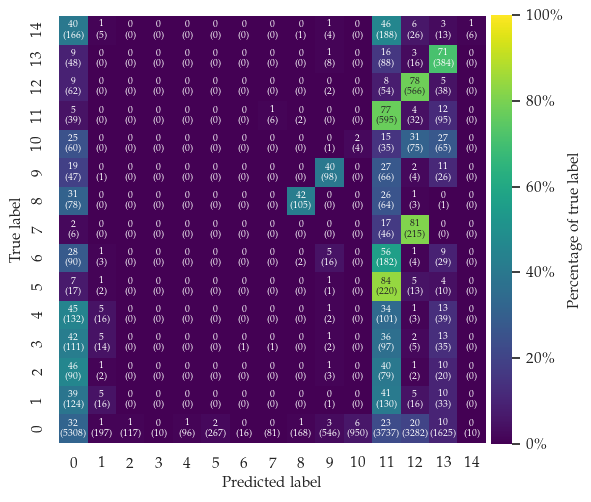

In [134]:
results_valid_labels_dhgtrained = pd.read_pickle(odhg_path/'results_valid_labels_dhgtrained.pkl')

fig = myplt.plot_CM_mplt(results_valid_labels_dhgtrained.loc[:, 'Y'], results_valid_labels_dhgtrained.loc[:, 'Y_hat'], '', fraction = 1)

fig.savefig((plotspath / 'CM_ODHG_dhgtrained.pdf').resolve(), bbox_inches='tight')

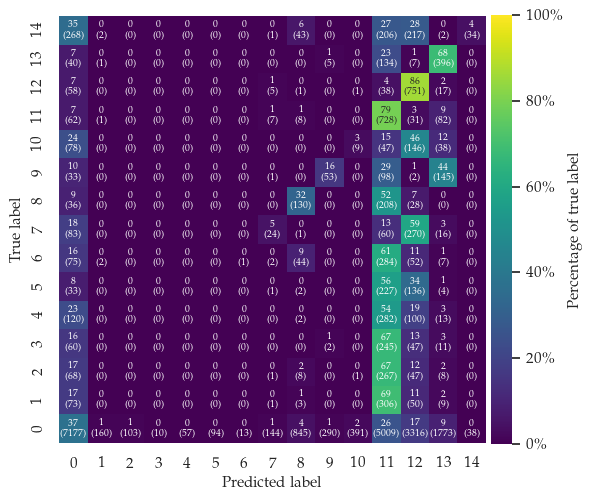

In [133]:
results_valid_labels_dhgtrained = pd.read_pickle(odhg_path/'results_valid_labels_dhgtrained_reversed.pkl')

fig = myplt.plot_CM_mplt(results_valid_labels_dhgtrained.loc[:, 'Y'], results_valid_labels_dhgtrained.loc[:, 'Y_hat'], '', fraction = 1)

fig.savefig((plotspath / 'CM_ODHG_dhgtrained_reversed.pdf').resolve(), bbox_inches='tight')

Only ODHG trained

In [23]:
results_valid_labels_onlyodhg = pd.read_pickle(odhg_path/'results_valid_labels_onlyodhg.pkl')
results_valid_labels_onlyodhg_reversed = pd.read_pickle(odhg_path/'results_valid_labels_onlyodhg.pkl')

bootstrapresults_onlyodhg = bootstrap_evaluation(results_valid_labels_onlyodhg, n_bootstrapsamples = 1000)
bootstrapresults_onlyodhg_reversed = bootstrap_evaluation(results_valid_labels_onlyodhg_reversed, n_bootstrapsamples = 1000)

bootstrapresults_onlyodhg.to_pickle(odhg_path/'bootstrapresults'/'bootstrapresults_onlyodhg.pkl')
bootstrapresults_onlyodhg_reversed.to_pickle(odhg_path/'bootstrapresults'/'bootstrapresults_onlyodhg_reversed.pkl')

[[0.65058949 0.29589075 1.26815306 2.        ]
 [0.65138389 0.29720048 1.27143888 2.        ]]
[[0.65058949 0.29589075 1.26815306 1.        ]
 [0.65138389 0.29720048 1.27143888 1.        ]]


c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:433: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(ax = ax1, data=scores_concat_plot1, x=categorie, y="value", hue="metric", errorbar = lambda x: np.quantile(x, [0.025, 0.975]), dodge = False,width = 0.3, palette=self.colorpalette)
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:444: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.barplot(ax = ax1_2, data=scores_concat_plot2, x=categorie, y="value", hue="metric", errorbar = lambda x: np.quantile(x, [0.025, 0.975]), dodge = False, width = 0.3, palette=colorpalette2)


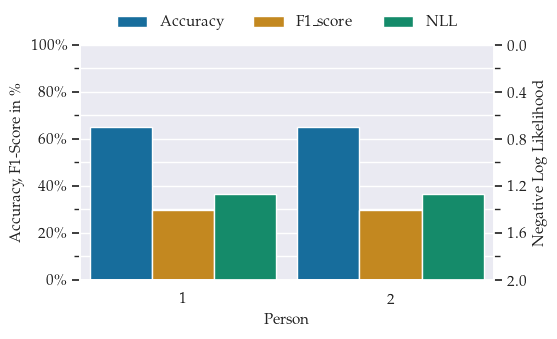

In [101]:
bootstrapresults_onlyodhg = pd.read_pickle(odhg_path/'bootstrapresults'/'bootstrapresults_onlyodhg.pkl')
bootstrapresults_onlyodhg_reversed = pd.read_pickle(odhg_path/'bootstrapresults'/'bootstrapresults_onlyodhg_reversed.pkl')

bootstrapresults_onlyodhg['Validation Person'] = 2
bootstrapresults_onlyodhg_reversed['Validation Person'] = 1
print(np.quantile(bootstrapresults_onlyodhg.values, [0.025, 0.975], axis = 0))
print(np.quantile(bootstrapresults_onlyodhg_reversed.values, [0.025, 0.975], axis = 0))
onlyodhg_results = pd.concat([bootstrapresults_onlyodhg, bootstrapresults_onlyodhg_reversed])

fig = myplt.plot_resultbars_ODHG(onlyodhg_results, NLLrange = [0,2])

# fig.savefig((plotspath / 'results_onlyodhg.pdf').resolve(), bbox_inches='tight')

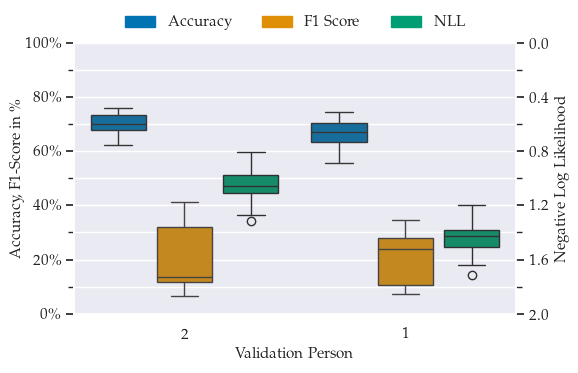

In [105]:
results_scores_onlyodhg = pd.read_pickle(odhg_path/'results_scores_onlyodhg.pkl')
results_scores_onlyodhg_reversed = pd.read_pickle(odhg_path/'results_scores_onlyodhg_reversed.pkl')

results_scores_onlyodhg['Validation Person'] = '2'
results_scores_onlyodhg_reversed['Validation Person'] = '1'
onlyodhg_results = pd.concat([results_scores_onlyodhg, results_scores_onlyodhg_reversed])

fig = myplt.plot_result_boxplot(onlyodhg_results,  NLLrange = [0,2], percentrange = [0,100], fraction=1)

fig.savefig((plotspath / 'results_onlyodhg.pdf').resolve(), bbox_inches='tight')

c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:285: SyntaxWarning: invalid escape sequence '\%'
  
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:287: SyntaxWarning: invalid escape sequence '\%'
  ax1.set_ylim(percentrange[0], percentrange[1])
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:357: SyntaxWarning: invalid escape sequence '\%'
  
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:359: SyntaxWarning: invalid escape sequence '\%'
  ax1.set_ylim(0, 100)
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:373: SyntaxWarning: invalid escape sequence '\%'
  
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:375: SyntaxWarning: invalid escape sequence '\%'
  ax2.set_ylim(0, 100)
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:419: SyntaxWarning: i

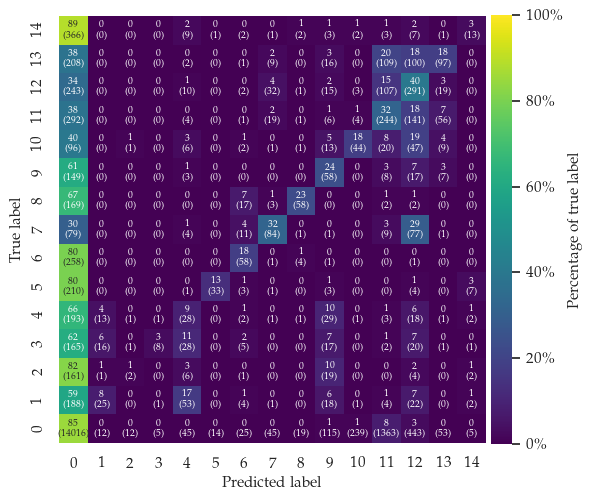

In [132]:
results_valid_labels_onlyodhg = pd.read_pickle(odhg_path/'results_valid_labels_onlyodhg.pkl')

fig = myplt.plot_CM_mplt(results_valid_labels_onlyodhg.loc[:, 'Y'], results_valid_labels_onlyodhg.loc[:, 'Y_hat'], '', fraction = 1)

fig.savefig((plotspath / 'CM_ODHG_onlyodhg.pdf').resolve(), bbox_inches='tight')

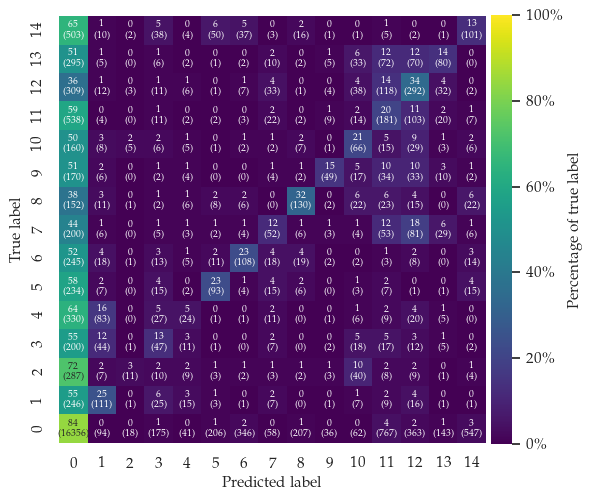

In [136]:
results_valid_labels_onlyodhg = pd.read_pickle(odhg_path/'results_valid_labels_onlyodhg_reversed.pkl')

fig = myplt.plot_CM_mplt(results_valid_labels_onlyodhg.loc[:, 'Y'], results_valid_labels_onlyodhg.loc[:, 'Y_hat'], '', fraction = 1)

fig.savefig((plotspath / 'CM_ODHG_onlyodhg_reversed.pdf').resolve(), bbox_inches='tight')

Retrained Results

In [37]:

results_valid_labels_retrained = pd.read_pickle(odhg_path/'results_valid_labels_retrained.pkl')
results_valid_labels_retrained_head = pd.read_pickle(odhg_path/'results_valid_labels_retrained_head_trainable.pkl')
results_valid_labels_reversed = pd.read_pickle(odhg_path/'results_valid_labels_retrained_reversed.pkl')

bootstrapresults_retrained = bootstrap_evaluation(results_valid_labels_retrained, n_bootstrapsamples = 1000)
bootstrapresults_retrained_head = bootstrap_evaluation(results_valid_labels_retrained_head, n_bootstrapsamples = 1000)
bootstrapresults_retrained_reversed = bootstrap_evaluation(results_valid_labels_reversed, n_bootstrapsamples = 1000)


In [39]:
bootstrapresults_retrained.to_pickle(odhg_path/'bootstrapresults'/'bootstrapresults_retrained.pkl')
bootstrapresults_retrained_head.to_pickle(odhg_path/'bootstrapresults'/'bootstrapresults_retrained_head.pkl')
bootstrapresults_retrained_reversed.to_pickle(odhg_path/'bootstrapresults'/'bootstrapresults_retrained_reversed.pkl')

[[0.81104171 0.44520073 0.90756592]
 [0.81168568 0.44658292 0.91157332]]
[[0.7926674  0.42807152 0.77786577]
 [0.79333851 0.42932097 0.78077407]]


c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:433: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(ax = ax1, data=scores_concat_plot1, x=categorie, y="value", hue="metric", errorbar = lambda x: np.quantile(x, [0.025, 0.975]), dodge = False,width = 0.3, palette=self.colorpalette)
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:444: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.barplot(ax = ax1_2, data=scores_concat_plot2, x=categorie, y="value", hue="metric", errorbar = lambda x: np.quantile(x, [0.025, 0.975]), dodge = False, width = 0.3, palette=colorpalette2)


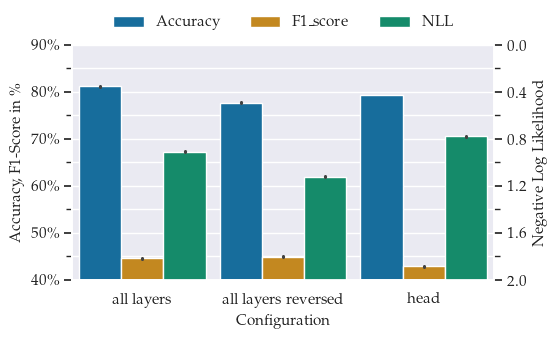

In [63]:
bootstrapresults_retrained = pd.read_pickle(odhg_path/'bootstrapresults'/'bootstrapresults_retrained.pkl')
bootstrapresults_retrained_head = pd.read_pickle(odhg_path/'bootstrapresults'/'bootstrapresults_retrained_head.pkl')
bootstrapresults_retrained_reversed = pd.read_pickle(odhg_path/'bootstrapresults'/'bootstrapresults_retrained_reversed.pkl')


bootstrapresults_retrained['Configuration'] = 'all layers'
bootstrapresults_retrained_reversed['Configuration'] = 'all layers reversed'
bootstrapresults_retrained_head['Configuration'] = 'head'
print(np.quantile(bootstrapresults_retrained.loc[:, 'accuracy':'NLL'].values, [0.025, 0.975], axis = 0))
print(np.quantile(bootstrapresults_retrained_head.loc[:, 'accuracy':'NLL'].values, [0.025, 0.975], axis = 0))
onlyodhg_results = pd.concat([bootstrapresults_retrained, bootstrapresults_retrained_reversed, bootstrapresults_retrained_head])

fig = myplt.plot_resultbars_ODHG(onlyodhg_results, NLLrange = [0,2], percentrange = [40,90], n_ticks = 6)

# fig.savefig((plotspath / 'results_retrained.pdf').resolve(), bbox_inches='tight')

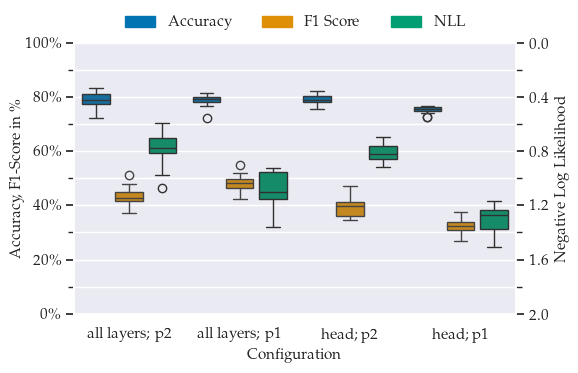

In [103]:
results_scores_retrained = pd.read_pickle(odhg_path/'results_scores_retrained.pkl')
results_scores_retrained_reversed = pd.read_pickle(odhg_path/'results_scores_retrained_reversed.pkl')
results_scores_retrained_head_trainable = pd.read_pickle(odhg_path/'results_scores_retrained_head_trainable.pkl')
results_scores_retrained_head_trainable_reversed = pd.read_pickle(odhg_path/'results_scores_retrained_head_trainable_reversed.pkl')

results_scores_retrained['Configuration'] = 'all layers; p2'
results_scores_retrained_reversed['Configuration'] = 'all layers; p1'
results_scores_retrained_head_trainable['Configuration'] = 'head; p2'
results_scores_retrained_head_trainable_reversed['Configuration'] = 'head; p1'

retrained_results = pd.concat([results_scores_retrained, results_scores_retrained_reversed, results_scores_retrained_head_trainable, results_scores_retrained_head_trainable_reversed])

fig = myplt.plot_result_boxplot(retrained_results,  NLLrange = [0,2], percentrange = [0,100], fraction=1)

fig.savefig((plotspath / 'results_retrained.pdf').resolve(), bbox_inches='tight')

c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:299: SyntaxWarning: invalid escape sequence '\%'
  ax1.set_ylabel('Accuracy, F1-Score in \%')
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:301: SyntaxWarning: invalid escape sequence '\%'
  ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}\%'))
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:373: SyntaxWarning: invalid escape sequence '\%'
  ax1.set_ylabel('Accuracy, F1-Score in \%')
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:375: SyntaxWarning: invalid escape sequence '\%'
  ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}\%'))
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_class\Skripts\Plots_Thesis.py:389: SyntaxWarning: invalid escape sequence '\%'
  ax2.set_ylabel('Accuracy in \%')
c:\Users\Marc\Documents\Marc\Karriere\Master\gesture_clas

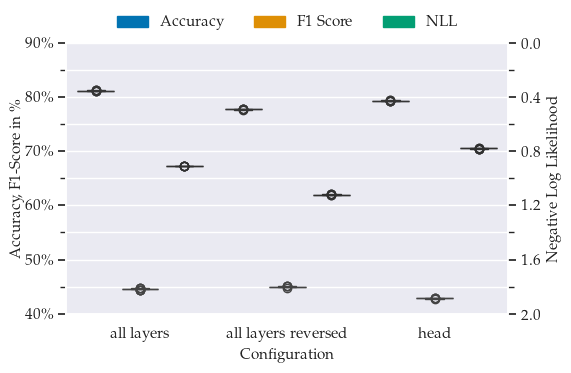

In [62]:

fig = myplt.plot_result_boxplot(onlyodhg_results, percentrange = [40,90], NLLrange=[0,2], fraction = 1)

fig.savefig((plotspath / 'results_retrained_box.pdf').resolve(), bbox_inches='tight')

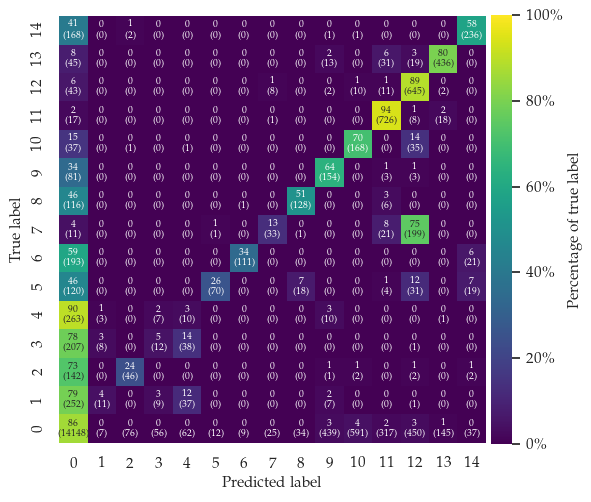

In [137]:
results_valid_labels_retrained = pd.read_pickle(odhg_path/'results_valid_labels_retrained.pkl')

fig = myplt.plot_CM_mplt(results_valid_labels_retrained.loc[:, 'Y'], results_valid_labels_retrained.loc[:, 'Y_hat'], '', fraction = 1)

fig.savefig((plotspath / 'CM_ODHG_retrained.pdf').resolve(), bbox_inches='tight')

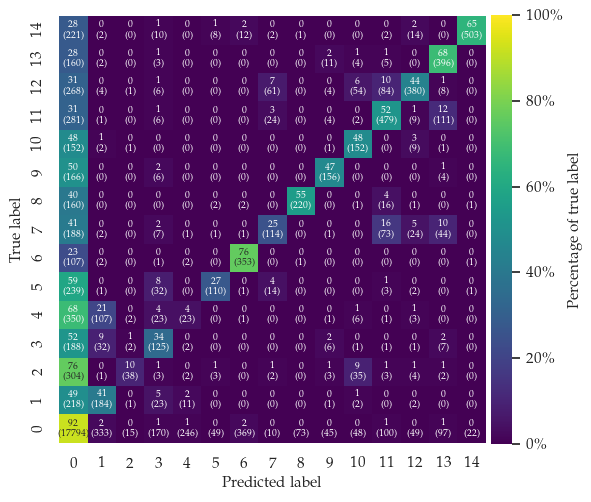

In [138]:
results_valid_labels_retrained = pd.read_pickle(odhg_path/'results_valid_labels_retrained_reversed.pkl')

fig = myplt.plot_CM_mplt(results_valid_labels_retrained.loc[:, 'Y'], results_valid_labels_retrained.loc[:, 'Y_hat'], '', fraction = 1)

fig.savefig((plotspath / 'CM_ODHG_retrained_reversed.pdf').resolve(), bbox_inches='tight')

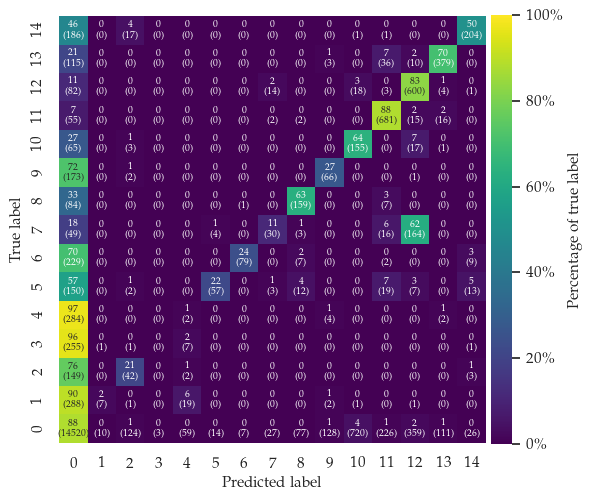

In [139]:
results_valid_labels_retrained = pd.read_pickle(odhg_path/'results_valid_labels_retrained_head_trainable.pkl')

fig = myplt.plot_CM_mplt(results_valid_labels_retrained.loc[:, 'Y'], results_valid_labels_retrained.loc[:, 'Y_hat'], '', fraction = 1)

fig.savefig((plotspath / 'CM_ODHG_retrained_head_trainable.pdf').resolve(), bbox_inches='tight')

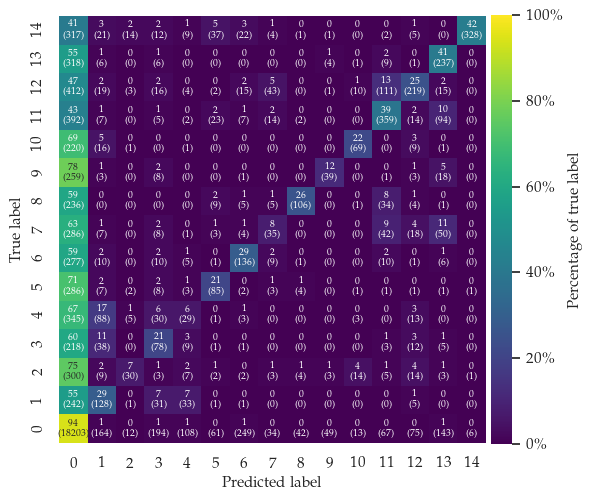

In [140]:
results_valid_labels_retrained = pd.read_pickle(odhg_path/'results_valid_labels_retrained_head_trainable_reversed.pkl')

fig = myplt.plot_CM_mplt(results_valid_labels_retrained.loc[:, 'Y'], results_valid_labels_retrained.loc[:, 'Y_hat'], '', fraction = 1)

fig.savefig((plotspath / 'CM_ODHG_retrained_head_trainable_reversed.pdf').resolve(), bbox_inches='tight')

In [ ]:
results_scores_onlyodhg = pd.read_pickle(odhg_path/'results_scores_onlyodhg.pkl')
results_scores_retrained = pd.read_pickle(odhg_path/'results_scores_retrained.pkl')